In [1]:
#import all libraries
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#read the data
df=pd.read_csv(r'C:\Users\GOURAV\Documents\ML Project\news.csv')
#get shape and head
df.shape
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#newsdata - get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
#to check if the data is equally balanced between the labels
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

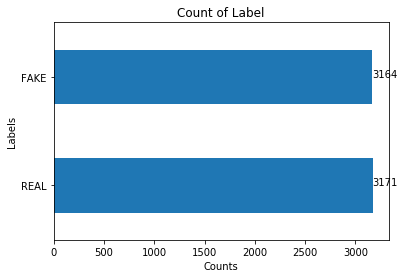

In [5]:
#plotting of data
df['label'].value_counts().plot(kind='barh')
plt.ylabel('Labels')
plt.xlabel('Counts')
plt.title('Count of Label')
x=["FAKE","REAL"]
y=[3171,3164]
for index,value in enumerate(y):
    plt.text(value,index,str(value))

In [6]:
df = df.set_index('Unnamed: 0')

In [7]:
df

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
#newsdata - split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [9]:
#newsdata - initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#newsdata - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [10]:
#newsdata - initialize a CountVectorizer
count_vectorizer=CountVectorizer(stop_words='english')
#newsdata - Fit and transform train set, transform test set
count_train=count_vectorizer.fit_transform(x_train) 
count_test=count_vectorizer.transform(x_test)

In [11]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
#initialize a MultinomialNBClassifier
clf = MultinomialNB(alpha=0.1)

accuracy:   0.904
[[549  89]
 [ 32 597]]
Confusion matrix, without normalization


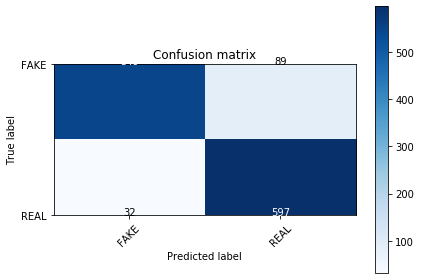

In [13]:
#newsdata - initialize a MultinomialNBClassifier for TfidfVectorizer
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
# Compute confusion matrix for CountVectorizer
cnf_matrix1 = confusion_matrix(y_test, pred)
print(cnf_matrix1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [14]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  549
False Positives:  89
False Negatives:  32
True Positives:  597


In [15]:
#Precision 
Precision = tp/(tp+fp)
print("Precision: {:0.4f}".format(Precision))
#Recall 
Recall = tp/(tp+fn) 
print("Recall: {:0.4f}".format(Recall))
#f1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("f1 Score: {:0.4f}".format(f1))
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity: {:0.4f}".format(Specificity))

Precision: 0.8703
Recall: 0.9491
f1 Score: 0.9080
Specificity: 0.8605


accuracy:   0.896
[[552  86]
 [ 46 583]]
Confusion matrix, without normalization


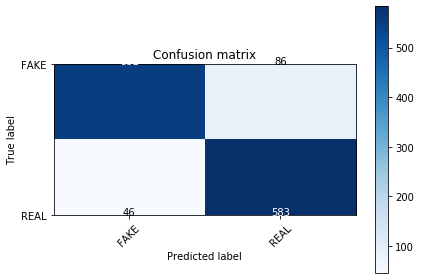

In [16]:
#newsdata - initialize a MultinomialNBClassifier for CountVectorizer
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
# Compute confusion matrix for CountVectorizer
cnf_matrix2 = confusion_matrix(y_test, pred)
print(cnf_matrix2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [17]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  552
False Positives:  86
False Negatives:  46
True Positives:  583


In [18]:
#Precision 
Precision = tp/(tp+fp)
print("Precision: {:0.4f}".format(Precision))
#Recall 
Recall = tp/(tp+fn) 
print("Recall: {:0.4f}".format(Recall))
#f1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("f1 Score: {:0.4f}".format(f1))
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity: {:0.4f}".format(Specificity))

Precision: 0.8714
Recall: 0.9269
f1 Score: 0.8983
Specificity: 0.8652


In [19]:
#initialize a PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.927
[[589  49]
 [ 43 586]]
Confusion matrix, without normalization


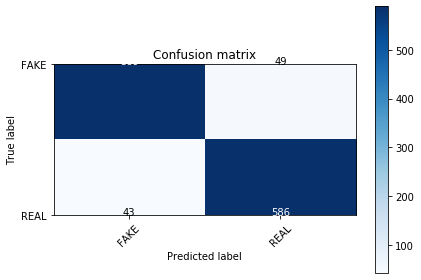

In [20]:
#newsdata - initialize a PassiveAggressiveClassifier for TfidfVectorizer
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
# Compute confusion matrix for CountVectorizer
cnf_matrix3 = confusion_matrix(y_test, pred)
print(cnf_matrix3)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [21]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  589
False Positives:  49
False Negatives:  43
True Positives:  586


In [22]:
#Precision 
Precision = tp/(tp+fp)
print("Precision: {:0.4f}".format(Precision))
#Recall 
Recall = tp/(tp+fn) 
print("Recall: {:0.4f}".format(Recall))
#f1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("f1 Score: {:0.4f}".format(f1))
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity: {:0.4f}".format(Specificity))

Precision: 0.9228
Recall: 0.9316
f1 Score: 0.9272
Specificity: 0.9232


accuracy:   0.908
[[569  69]
 [ 48 581]]
Confusion matrix, without normalization


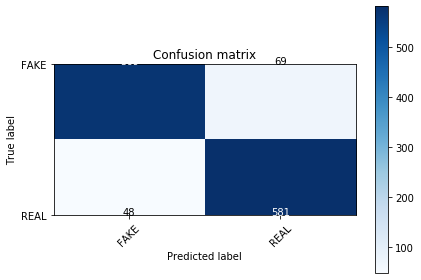

In [23]:
#newsdata - initialize a PassiveAggressiveClassifier for CountVectorizer
linear_clf.fit(count_train, y_train)
pred = linear_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
# Compute confusion matrix for CountVectorizer
cnf_matrix4 = confusion_matrix(y_test, pred)
print(cnf_matrix4)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [24]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  569
False Positives:  69
False Negatives:  48
True Positives:  581


In [25]:
#Precision 
Precision = tp/(tp+fp)
print("Precision: {:0.4f}".format(Precision))
#Recall 
Recall = tp/(tp+fn) 
print("Recall: {:0.4f}".format(Recall))
#f1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("f1 Score: {:0.4f}".format(f1))
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity: {:0.4f}".format(Specificity))

Precision: 0.8938
Recall: 0.9237
f1 Score: 0.9085
Specificity: 0.8918


In [26]:
#most no of fake and real news
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -0.6266883372573328 posts
FAKE -0.4937106253337851 losing
FAKE -0.4646384594217646 share
FAKE -0.45165335321716527 october
FAKE -0.39878129249985317 article
FAKE -0.3943006724759358 dark
FAKE -0.35167100801642664 2016
FAKE -0.3510830301022513 recent
FAKE -0.3456944120561702 art
FAKE -0.31752460019063067 com
FAKE -0.31264646071274343 intimidation
FAKE -0.3009990791529037 arrivals
FAKE -0.30037378961827693 establishment
FAKE -0.299987805112999 november
FAKE -0.29722902018426206 source
FAKE -0.29074305911717296 print
FAKE -0.2894701860181788 add
FAKE -0.2824875250007047 swipe
FAKE -0.2797556268338981 comments
FAKE -0.27477823012477093 video
FAKE -0.2727270192298709 mosul
FAKE -0.2717265721376592 wikileaks
FAKE -0.2699464976688637 hillary
FAKE -0.26226180118756187 pay
FAKE -0.2546766743008932 daily
FAKE -0.24605845319177655 bamforth
FAKE -0.24472500647576573 adrian
FAKE -0.2405763700623754 watch
FAKE -0.24014151927272026 left
FAKE -0.23774715386931264 28

REAL 0.5542086220909784 rush


In [27]:
feature_names = tfidf_vectorizer.get_feature_names()

In [28]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-16.272226130581554, '000035'),
 (-16.272226130581554, '0001'),
 (-16.272226130581554, '0001pt'),
 (-16.272226130581554, '0002'),
 (-16.272226130581554, '000billion'),
 (-16.272226130581554, '0011'),
 (-16.272226130581554, '004s'),
 (-16.272226130581554, '005'),
 (-16.272226130581554, '005s'),
 (-16.272226130581554, '00684'),
 (-16.272226130581554, '006s'),
 (-16.272226130581554, '007'),
 (-16.272226130581554, '007s'),
 (-16.272226130581554, '008s'),
 (-16.272226130581554, '0099'),
 (-16.272226130581554, '00am'),
 (-16.272226130581554, '00p'),
 (-16.272226130581554, '00pm'),
 (-16.272226130581554, '013c2812c9'),
 (-16.272226130581554, '014')]

In [29]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.425109600312677, 'said'),
 (-4.522246319612897, 'trump'),
 (-4.913489679506659, 'clinton'),
 (-5.433999076102811, 'people'),
 (-5.43734250839567, 'state'),
 (-5.474468531540541, 'president'),
 (-5.518993714015171, 'obama'),
 (-5.522634286821445, 'new'),
 (-5.54871648515088, 'campaign'),
 (-5.6934753665840425, 'republican'),
 (-5.790413196932821, 'party'),
 (-5.904344402407975, 'time'),
 (-5.910333199226768, 'like'),
 (-5.927230878590333, 'states'),
 (-5.938548337550461, 'sanders'),
 (-5.938873583113727, 'just'),
 (-6.0240501866528735, 'house'),
 (-6.045894498625599, 'percent'),
 (-6.0649002240255605, 'political'),
 (-6.1210585238863136, 'cruz')]

In [30]:
mn_count_clf = MultinomialNB(alpha=0.1)
mn_tfidf_clf = MultinomialNB(alpha=0.1)
pa_count_clf = PassiveAggressiveClassifier(max_iter=50)
pa_tfidf_clf = PassiveAggressiveClassifier(max_iter=50)

In [31]:
mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.896


In [32]:
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.904


In [33]:
pa_count_clf.fit(count_train, y_train)
pred = pa_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.904


In [34]:
pa_tfidf_clf.fit(tfidf_train, y_train)
pred = pa_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.927


In [35]:
mn_count_clf.predict_proba?

In [36]:
mn_tfidf_clf.predict_proba?

In [37]:
pa_count_clf.decision_function?

In [38]:
pa_tfidf_clf.decision_function?

multinomial nb count : ROC AUC =0.943
multinomial nb tfidf : ROC AUC =0.974
passive aggressive count : ROC AUC =0.965
passive aggressive tfidf : ROC AUC =0.984


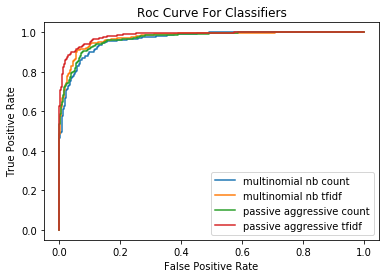

In [39]:
#roc curve plot
plt.figure(0).clf()

for model, name in [ (mn_count_clf, 'multinomial nb count'),
                     (mn_tfidf_clf, 'multinomial nb tfidf'),
                     (pa_count_clf, 'passive aggressive count'),
                     (pa_tfidf_clf, 'passive aggressive tfidf')]:
    if 'multinomial' in name:
        pred = model.predict_proba(count_test)[:,1]
        pred = model.predict_proba(tfidf_test)[:,1]
    else:
        pred = model.decision_function(count_test) 
        pred = model.decision_function(tfidf_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred, pos_label='REAL')
    plt.plot(fpr,tpr,label="{}".format(name))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve For Classifiers')
plt.legend(loc=0)


#roc_auc_score determine
pred = mn_count_clf.predict_proba(count_test)[:,1]
lr_auc1=metrics.roc_auc_score(y_test.values,pred)
print('multinomial nb count : ROC AUC =%.3f' % (lr_auc1))
pred = mn_tfidf_clf.predict_proba(tfidf_test)[:,1]
lr_auc2=metrics.roc_auc_score(y_test.values,pred)
print('multinomial nb tfidf : ROC AUC =%.3f' % (lr_auc2))
pred = pa_count_clf.decision_function(count_test)
lr_auc3=metrics.roc_auc_score(y_test.values,pred)
print('passive aggressive count : ROC AUC =%.3f' % (lr_auc3))
pred = pa_tfidf_clf.decision_function(tfidf_test)
lr_auc4=metrics.roc_auc_score(y_test.values,pred)
print('passive aggressive tfidf : ROC AUC =%.3f' % (lr_auc4))

In [40]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):    
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    
    Modified by @kjam to support a dict return.
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    return {class_labels[0]: topn_class1,
            class_labels[1]: topn_class2
    }


most_informative_feature_for_binary_classification(tfidf_vectorizer, pa_tfidf_clf, n=10)

{'FAKE': [(-5.75262481957928, '2016'),
  (-5.013395767858511, 'october'),
  (-3.3317257993521103, 'share'),
  (-3.1820089432261827, 'november'),
  (-3.1797842442085833, 'hillary'),
  (-3.166170786600595, 'election'),
  (-2.98624689630123, 'article'),
  (-2.7660263445195885, 'establishment'),
  (-2.622800113119332, 'source'),
  (-2.6008732183439367, 'advertisement')],
 'REAL': [(2.2081239496198077, 'tuesday'),
  (2.2393404470471086, 'march'),
  (2.3409065304458325, 'rush'),
  (2.5316800802138326, 'candidates'),
  (2.774128444835958, 'friday'),
  (2.795466506249762, 'gop'),
  (2.859657787244346, 'conservative'),
  (3.032373662107259, 'marriage'),
  (3.2988305717585407, 'says'),
  (4.885489173724793, 'said')]}

In [41]:
classifiers = [(mn_count_clf, count_vectorizer),
               (mn_tfidf_clf, tfidf_vectorizer),
               (pa_count_clf, count_vectorizer),
               (pa_tfidf_clf, tfidf_vectorizer)]                               

In [42]:
results = {}
for clf, vct in classifiers:
    results[clf] = most_informative_feature_for_binary_classification(vct, clf, n=10)

In [43]:
results

{MultinomialNB(alpha=0.1): {'FAKE': [(-16.272226130581554, '000035'),
   (-16.272226130581554, '0001'),
   (-16.272226130581554, '0001pt'),
   (-16.272226130581554, '0002'),
   (-16.272226130581554, '000billion'),
   (-16.272226130581554, '0011'),
   (-16.272226130581554, '004s'),
   (-16.272226130581554, '005'),
   (-16.272226130581554, '005s'),
   (-16.272226130581554, '00684')],
  'REAL': [(-5.6934753665840425, 'republican'),
   (-5.54871648515088, 'campaign'),
   (-5.522634286821445, 'new'),
   (-5.518993714015171, 'obama'),
   (-5.474468531540541, 'president'),
   (-5.43734250839567, 'state'),
   (-5.433999076102811, 'people'),
   (-4.913489679506659, 'clinton'),
   (-4.522246319612897, 'trump'),
   (-4.425109600312677, 'said')]},
 MultinomialNB(alpha=0.1): {'FAKE': [(-12.818865656435252, '000035'),
   (-12.818865656435252, '0001'),
   (-12.818865656435252, '0001pt'),
   (-12.818865656435252, '0002'),
   (-12.818865656435252, '000billion'),
   (-12.818865656435252, '0011'),
   (-1

In [44]:
comparable_results = {'REAL': {}, 'FAKE': {}}
for clf, data in results.items():
    clf_name = clf.__class__.__name__
    for label, features in data.items():
        for rank, score_tuple in enumerate(features):
            if score_tuple[1] in comparable_results[label]:
                comparable_results[label][score_tuple[1]].append((rank + 1, clf_name))
            else:
                comparable_results[label][score_tuple[1]] = [(rank + 1, clf_name)]

In [45]:
agg_results = {}
for label, features in comparable_results.items():
    for feature, ranks in features.items():
        if feature in agg_results:
            print("WARNING! DUPLICATE LABEL!!! {}".format(feature))
        agg_results[feature] = {
            'label': label,
            'agg_rank': np.mean([r[0] for r in ranks]),
            'count': len(ranks)
        }

In [46]:
comparison_df = pd.DataFrame(agg_results).T

In [47]:
comparison_df[comparison_df['label'] == 'REAL'].sort_values('count', ascending=0).head(10)

,label,agg_rank,count
said,REAL,9.66667,3
republican,REAL,1.5,2
rush,REAL,6.5,2
march,REAL,5,2
gop,REAL,6,2
friday,REAL,5,2
candidates,REAL,3.5,2
campaign,REAL,3.5,2
marriage,REAL,4.5,2
trump,REAL,9.5,2


In [48]:
comparison_df[comparison_df['label'] == 'FAKE'].sort_values('count', ascending=0).head(10)

,label,agg_rank,count
000035,FAKE,1,2
005s,FAKE,9,2
2016,FAKE,4.5,2
share,FAKE,4,2
0001,FAKE,2,2
article,FAKE,5,2
00684,FAKE,10,2
october,FAKE,3,2
005,FAKE,8,2
000billion,FAKE,5,2
